In [67]:
import numpy as np
import matplotlib.pyplot as plt

num_experimentos = 30
num_corridas = 100

tiempos_experimentos = []
criticidad_accesos_experimentos = []


tareas = {
    'A' : {'nombre' : "Romper huevos", 'demora_min': 2, 'demora_max': 4},
    'B' : {'nombre' : "Revolver huevos", 'demora_min': 3, 'demora_max': 6},
    'C' : {'nombre' : "Cocinar huevos", 'demora_min': 2, 'demora_max': 5},
    'D' : {'nombre' : "Cortar panes", 'demora_min': 3, 'demora_max': 6},
    'E' : {'nombre' : "Preparar tostadas", 'demora_min': 2, 'demora_max': 5},
    'F' : {'nombre' : "Preparar bebidas calientes", 'demora_min': 4, 'demora_max': 8},
    'G' : {'nombre' : "Preparar bebidas frías", 'demora_min': 3, 'demora_max': 7}
}

def generar_tiempo(min, max, size):
    return np.random.uniform(min, max, size)

def realizar_tarea(ref):
    tarea = tareas[ref]
    tiempo = generar_tiempo(tarea['demora_min'], tarea['demora_max'], 1)
    return tiempo

def simular_tareas():

    #Tiempos de tareas acceso superior
    tarea_a = realizar_tarea('A')
    tarea_b = realizar_tarea('B')
    tarea_c = realizar_tarea('C')
    acceso_superior = max(tarea_a + tarea_b + tarea_c)
    print("acceso superior", acceso_superior)
    #Tiempos de tareas acceso medio
    tarea_d = realizar_tarea('D')
    tarea_e = realizar_tarea('E')
    acceso_medio = max(tarea_d + tarea_e)
    print("acceso medio",acceso_medio)
    #Tiempos de tareas acceso inferior
    tarea_f = realizar_tarea('F')
    tarea_g = realizar_tarea('G')
    acceso_inferior = max(tarea_f + tarea_g)
    print("acceso inferior",acceso_inferior)

    tiempo_total = max(acceso_superior, acceso_medio, acceso_inferior) #El tiempo maximo de los 3 accesos
    return tiempo_total, acceso_superior, acceso_medio, acceso_inferior

"""
Simular el experimento segun la cantidad de corridas de la simulacion de tareas
para determinar la criticidad de las mismas.
"""
def simular_experimento(num_corridas):
    tiempos_experimento = []
    criticidad_accesos = {'superior': 0, 'medio': 0, 'inferior': 0}

    for _ in range(num_corridas):
        tiempo_total, acceso_superior, acceso_medio, acceso_inferior = simular_tareas()
        print(acceso_superior)
        print(acceso_medio)
        print(acceso_inferior)
        tiempos_experimento.append(tiempo_total)

        if tiempo_total == acceso_superior:
            criticidad_accesos['superior'] += 1
        if tiempo_total == acceso_medio:
            criticidad_accesos['medio'] += 1
        if tiempo_total == acceso_inferior:
            criticidad_accesos['inferior'] += 1
    print(tiempos_experimento)
    return tiempos_experimento, criticidad_accesos

def calcular_intervalo_confianza(media_muestral, mult_desvio, desvio_estandar, z, n):
    print("desvio estandar", desvio_estandar)
    error_estandar = z * ( (mult_desvio * desvio_estandar) / np.sqrt(n))
    print("error estandar", error_estandar)
    extremo_inferior = media_muestral - error_estandar
    extremo_superior = media_muestral + error_estandar
    
    print("ext sup", extremo_superior)
    print("exp inf", extremo_inferior)
    return extremo_inferior, extremo_superior


In [68]:




for _ in range(num_experimentos):
    tiempos_experimento, criticidad_accesos = simular_experimento(num_corridas)
    tiempos_experimentos.append(tiempos_experimento)
    criticidad_accesos_experimentos.append(criticidad_accesos)


acceso superior 9.575023878328066
acceso medio 8.386150195898166
acceso inferior 11.146552567364814
9.575023878328066
8.386150195898166
11.146552567364814
acceso superior 11.327705045952289
acceso medio 8.484150233646265
acceso inferior 9.025968755345616
11.327705045952289
8.484150233646265
9.025968755345616
acceso superior 7.969402246264828
acceso medio 8.914055326931834
acceso inferior 10.715724279979598
7.969402246264828
8.914055326931834
10.715724279979598
acceso superior 10.360465492302216
acceso medio 6.96697601126038
acceso inferior 12.129661341603647
10.360465492302216
6.96697601126038
12.129661341603647
acceso superior 9.868748602537565
acceso medio 9.721716655127079
acceso inferior 10.960755511715337
9.868748602537565
9.721716655127079
10.960755511715337
acceso superior 11.481246304126579
acceso medio 8.84247938313873
acceso inferior 10.160142072679797
11.481246304126579
8.84247938313873
10.160142072679797
acceso superior 13.338070437340464
acceso medio 7.119051683564026
acce

In [69]:
# 1. Calcular tiempo promedio de finalización del proyecto e IC

tiempo_promedio_experimentos = np.mean(tiempos_experimentos)
print("tiempo exp:",tiempos_experimentos)
print("tiempo promedio exp:", tiempo_promedio_experimentos)
n = num_experimentos * num_corridas
desvio_estandar = np.std(tiempos_experimentos)
print("des_std", desvio_estandar)
ic_99_inf, ic_99_sup = calcular_intervalo_confianza(tiempo_promedio_experimentos, 1, desvio_estandar, 2.57, n)
print("Tiempo promedio de finalización del proyecto:", tiempo_promedio_experimentos)
print("Intervalo de confianza al 99%:", (ic_99_inf, ic_99_sup))

tiempo exp: [[11.146552567364814, 11.327705045952289, 10.715724279979598, 12.129661341603647, 10.960755511715337, 11.481246304126579, 13.338070437340464, 9.692667508769624, 10.062632725982837, 13.367127527192245, 11.965673319016442, 10.496311457544792, 11.889477125175247, 10.721699492225026, 9.911674112021013, 10.378081620003725, 12.586744596059567, 13.036994264250348, 12.64464861307283, 10.527184766915454, 11.943721593545789, 12.58528191465074, 9.465573523409589, 12.568461514429577, 12.54861802670998, 13.184633360639927, 8.484051515055352, 11.636916661700681, 12.314736687327652, 11.44229299124758, 11.841455271338848, 11.526775283584389, 14.20436767924457, 14.76792793801282, 12.031927144111968, 13.351251054247088, 10.87977167623253, 12.4449417000903, 9.822179819510879, 9.990620228700237, 13.835628934163113, 12.207977612292803, 11.48536651553197, 13.907874127875273, 11.331800162738963, 13.507169077430454, 13.16540589851605, 11.939382533346993, 12.29354743925989, 10.143963854360821, 13.4

In [70]:
# 2. Calcular porcentaje de criticidad de los accesos
total_corridas = num_experimentos * num_corridas
criticidad_accesos_totales = {'superior': 0, 'medio': 0, 'inferior': 0}

for criticidad_accesos in criticidad_accesos_experimentos:
    for key, value in criticidad_accesos.items():
        criticidad_accesos_totales[key] += value

for key, value in criticidad_accesos_totales.items():
    print("Porcentaje de criticidad para acceso", key, ":", value / total_corridas * 100)


Porcentaje de criticidad para acceso superior : 49.1
Porcentaje de criticidad para acceso medio : 1.6
Porcentaje de criticidad para acceso inferior : 49.3


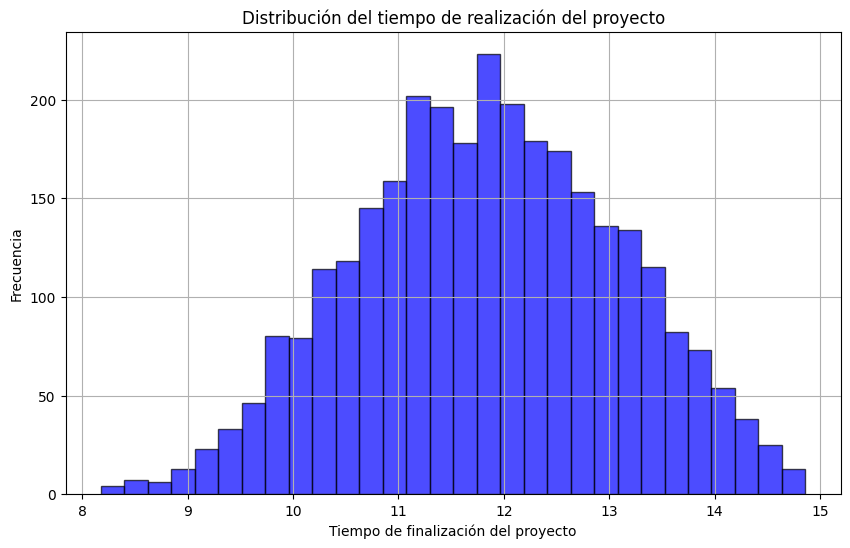

TypeError: unhashable type: 'dict'

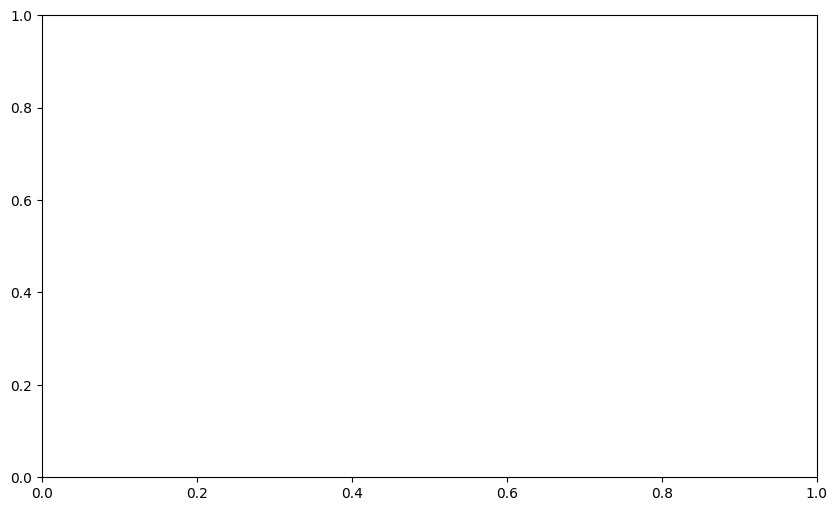

In [77]:
# 3. Graficar histograma de distribución del tiempo de realización del proyecto
plt.figure(figsize=(10, 6))
plt.hist(np.array(tiempos_experimentos).flatten(), bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribución del tiempo de realización del proyecto')
plt.xlabel('Tiempo de finalización del proyecto')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Graficar histograma de promedios de los 30 experimentos
plt.figure(figsize=(10, 6))
plt.hist(np.array(criticidad_accesos_experimentos).flatten(), bins=30, alpha=0.7, color='green', edgecolor='black')
plt.title('Distribución de promedios de los 30 experimentos')
plt.xlabel('Promedio de tiempo de finalización del proyecto')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()